# Grab - Safety
Submitted by: Group 4
- Jo Hyunsuh
- EV Chua Yee Suan
- Timothy Toh

# Data Importing

In [1]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.23.1
Numpy version=1.18.5
Pandas version=1.0.5
Matplotlib version=3.2.2
Python version=3.8.3


In [3]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
# Load the datasets
data = pd.read_csv('Safety_DataSet_Aggregated.csv')

In [5]:
data.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,0
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,0
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,0
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,0
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,0


# Data Exploration / Cleansing

1. bookingID: trip 
2. Accuracy: accuracy inferred by GPS in meters
3. Bearing: GPS bearing in degree
4. acceleration_x: accelerometer reading at x axis (m/s2)
5. acceleration_y: accelerometer reading at y axis (m/s2)
6. acceleration_z: accelerometer reading at z axis (m/s2)
(Acceleration determines the acceleration / vibration of the device in motion. Each of the axis can be thought of as a different sensor even though they reside on the same physical chip)
7. gyro_x: gyroscope reading in x axis (rad/s)
8. gyro_y: gyroscope reading in y axis (rad/s)
9. gyro_z: gyroscope reading in z axis (rad/s)
(Gyroscope data determine the orientation of the device relative to earth's gravity)
10. second: time of the record by number of seconds
11. Speed: speed measured by GPS in m/s
12. label: tags to indicate dangerous driving trip (0: Normal trip / 1: Dangerous trip)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16154418 entries, 0 to 16154417
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bookingID       int64  
 1   Accuracy        float64
 2   Bearing         float64
 3   acceleration_x  float64
 4   acceleration_y  float64
 5   acceleration_z  float64
 6   gyro_x          float64
 7   gyro_y          float64
 8   gyro_z          float64
 9   second          float64
 10  Speed           float64
 11  label           int64  
dtypes: float64(10), int64(2)
memory usage: 1.4 GB


In [7]:
# List out all variables with null/missing values
data.isnull().sum()

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
label             0
dtype: int64

In this dataset:
- there are 16135561 trip information
- there are 11 columns
- all columns are nummeric variables
- there is no null value

In [8]:
data.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
count,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07
mean,8.185295e+11,1.160744e+01,1.689771e+02,6.931060e-02,4.464359e+00,8.927299e-01,-1.713431e-03,2.663392e-04,-2.538211e-04,3.799905e+03,9.006626e+00,3.057288e-01
std,4.953377e+11,8.686924e+01,1.072962e+02,1.423701e+00,8.132821e+00,3.252890e+00,1.445047e-01,3.398832e-01,1.480109e-01,1.435848e+06,8.106292e+00,4.607154e-01
min,0.000000e+00,7.500000e-01,0.000000e+00,-7.841969e+01,-7.299412e+01,-7.844842e+01,-4.845575e+01,-7.488861e+01,-5.355445e+01,0.000000e+00,-2.000000e+00,0.000000e+00
25%,3.779571e+11,3.900000e+00,7.800000e+01,-5.078247e-01,-2.113992e+00,-9.337672e-01,-2.678341e-02,-2.994671e-02,-1.875904e-02,2.410000e+02,1.020000e+00,0.000000e+00
50%,8.074539e+11,4.255000e+00,1.689621e+02,6.159973e-02,9.081207e+00,7.740933e-01,-6.442187e-04,2.620612e-04,-3.490659e-05,5.200000e+02,7.530000e+00,0.000000e+00
75%,1.254130e+12,8.000000e+00,2.630000e+02,6.353790e-01,9.709685e+00,2.749072e+00,2.330015e-02,3.141785e-02,1.823433e-02,8.630000e+02,1.548000e+01,1.000000e+00
max,1.709397e+12,6.070101e+03,3.599995e+02,6.687346e+01,7.505589e+01,7.805576e+01,3.983975e+01,8.031496e+01,6.630078e+01,1.495797e+09,1.480186e+02,1.000000e+00


There are some erroneous values:
1. second
  - 0 second trip
  - unreasonably high trip times
2. Speed
  - negative speed
  - impossibly high speed

The reason for this is most likely due to poor GPS accuracy.

In [9]:
# choose GPS data with high accuracy 
data = data.loc[(data.Accuracy >= np.percentile(data.Accuracy, 95))]

# filter out 0 second trips and trips longer than 12 hours
data = data.loc[(data.second != 0) & (data.second < 43200)]

# filter out data with negative speed and speed higher than 30m/s(108km/h)
data = data.loc[(data.Speed > 0) & (data.Speed < 30)]

In [10]:
data.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
count,8.170190e+05,817019.000000,817019.000000,817019.000000,817019.000000,817019.000000,817019.000000,817019.000000,817019.000000,817019.000000,8.170190e+05,817019.000000
mean,8.294812e+11,25.160237,175.791531,-0.019907,-4.195807,-1.094720,-0.003969,0.000845,-0.000074,509.629586,6.954522e+00,0.328029
std,4.965411e+11,23.453135,101.876953,1.555126,7.966180,3.793532,0.196533,0.247659,0.200279,432.919653,6.549585e+00,0.469496
min,0.000000e+00,16.000000,0.000000,-43.599203,-56.388879,-75.936990,-9.719521,-18.139412,-17.828683,1.000000,9.423920e-15,0.000000
25%,3.951370e+11,16.000000,89.644119,-0.592462,-9.680670,-3.293533,-0.032629,-0.037887,-0.021776,183.000000,1.505055e+00,0.000000
50%,8.160438e+11,16.687000,177.214630,-0.015103,-8.954672,-0.948657,-0.004280,0.001431,-0.000216,402.000000,4.928909e+00,0.000000
75%,1.262720e+12,32.000000,266.688110,0.562854,2.140139,0.966036,0.023717,0.039939,0.021305,716.000000,1.092374e+01,1.000000
max,1.709397e+12,556.746000,359.994781,66.873456,56.003525,48.228094,13.535559,35.858337,24.196860,6251.000000,2.999742e+01,1.000000


# Feature Engineering

## Distance

In [11]:
data['distance']=data['Speed']*data['second']

## Speed

In [12]:
data['speed_x']=data['acceleration_x']*data['second']
data['speed_y']=data['acceleration_y']*data['second']
data['speed_z']=data['acceleration_z']*data['second']
data['speed_xy']=np.sqrt(data['speed_x']**2+data['speed_y']**2)
data['speed_xz']=np.sqrt(data['speed_x']**2+data['speed_z']**2)
data['speed_yz']=np.sqrt(data['speed_z']**2+data['speed_y']**2)
data['speed_xyz']=np.sqrt(data['speed_x']**2+data['speed_y']**2+data['speed_z']**2)

## Radian

In [13]:
data['rad_x']=data['gyro_x']*data['second']
data['rad_y']=data['gyro_y']*data['second']
data['rad_z']=data['gyro_z']*data['second']
data['rad_xy']=np.sqrt(data['rad_x']**2+data['rad_y']**2)
data['rad_xz']=np.sqrt(data['rad_x']**2+data['rad_z']**2)
data['rad_yz']=np.sqrt(data['rad_z']**2+data['rad_y']**2)
data['rad_xyz']=np.sqrt(data['rad_x']**2+data['rad_y']**2+data['rad_z']**2)

## Acceleration

In [14]:
data['acc_xy']=np.sqrt(data['acceleration_x']**2+data['acceleration_y']**2)
data['acc_xz']=np.sqrt(data['acceleration_x']**2+data['acceleration_z']**2)
data['acc_yz']=np.sqrt(data['acceleration_z']**2+data['acceleration_y']**2)
data['acc_xyz']=np.sqrt(data['acceleration_x']**2+data['acceleration_y']**2+data['acceleration_z']**2)

## Gyro

In [15]:
data['gyro_xy']=np.sqrt(data['gyro_x']**2+data['gyro_y']**2)
data['gyro_xz']=np.sqrt(data['gyro_x']**2+data['gyro_z']**2)
data['gyro_yz']=np.sqrt(data['gyro_z']**2+data['gyro_y']**2)
data['gyro_xyz']=np.sqrt(data['gyro_x']**2+data['gyro_y']**2+data['gyro_z']**2)

## Interaction

In [16]:
data['acc_gyro_x']=data['acceleration_x']*data['gyro_x']
data['acc_gyro_y']=data['acceleration_y']*data['gyro_y']
data['acc_gyro_z']=data['acceleration_z']*data['gyro_z']
data['acc_gyro_xy']=np.sqrt(data['acc_gyro_x']**2+data['acc_gyro_y']**2)
data['acc_gyro_xz']=np.sqrt(data['acc_gyro_x']**2+data['acc_gyro_z']**2)
data['acc_gyro_yz']=np.sqrt(data['acc_gyro_z']**2+data['acc_gyro_y']**2)
data['acc_gyro_xyz']=np.sqrt(data['acc_gyro_x']**2+data['acc_gyro_y']**2+data['acc_gyro_z']**2)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817019 entries, 64 to 16154172
Data columns (total 42 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   bookingID       817019 non-null  int64  
 1   Accuracy        817019 non-null  float64
 2   Bearing         817019 non-null  float64
 3   acceleration_x  817019 non-null  float64
 4   acceleration_y  817019 non-null  float64
 5   acceleration_z  817019 non-null  float64
 6   gyro_x          817019 non-null  float64
 7   gyro_y          817019 non-null  float64
 8   gyro_z          817019 non-null  float64
 9   second          817019 non-null  float64
 10  Speed           817019 non-null  float64
 11  label           817019 non-null  int64  
 12  distance        817019 non-null  float64
 13  speed_x         817019 non-null  float64
 14  speed_y         817019 non-null  float64
 15  speed_z         817019 non-null  float64
 16  speed_xy        817019 non-null  float64
 17  speed_x

# Model Training

## Split Data into Train and Test Sets

In [19]:
X = data.drop(['label'], axis=1).values
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Logistic Regression

In [20]:
clflog = LogisticRegression()
clflog.fit(X_train, y_train)

LogisticRegression()

## Random Forest

In [21]:
clfrfc = RandomForestClassifier()
clfrfc.fit(X_train, y_train)

RandomForestClassifier()

# Model Evaluation

## Logistic Regression

In [22]:
y_hat= clflog.predict(X_test)
y_hat2= clflog.predict(X_train)

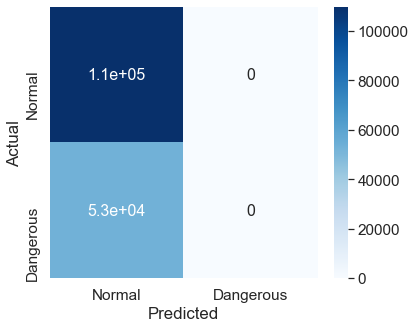

In [23]:
# evaluate model for test set
class_names=["Normal","Dangerous"]
cm = confusion_matrix(y_test, y_hat, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [24]:
# Accuracy score for test set
testlog = accuracy_score(y_test, y_hat)

# Accuracy score for train set
trainlog = accuracy_score(y_train, y_hat2)

## Random Forest

In [25]:
y_hat= clfrfc.predict(X_test)
y_hat2= clfrfc.predict(X_train)

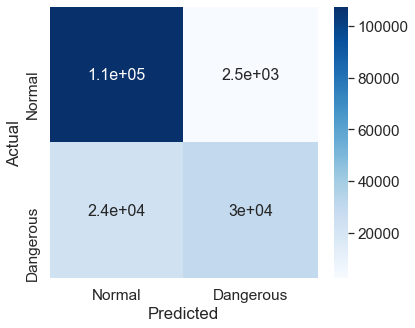

In [26]:
# evaluate model for test set
class_names=["Normal","Dangerous"]
cm = confusion_matrix(y_test, y_hat, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [27]:
# Accuracy score for test set
testrfc = accuracy_score(y_test, y_hat)

# Accuracy score for train set
trainrfc = accuracy_score(y_train, y_hat2)

## Model summary

In [29]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest'],
    
    'Test': [testlog, testrfc],
    
    'Train': [trainlog, trainrfc],
    
    'Mean': [(testlog+trainlog)/2, (testrfc+trainrfc)/2],
    })

models.sort_values(by='Mean', ascending=False)

,Model,Test,Train,Mean
1,Random Forest,0.840396,0.998375,0.919385
0,Logistic Regression,0.672627,0.671807,0.672217
